## Libraries and Data Import

In [1]:
# Group No: 55
# Samarakoon P. G. C. EG/2020/4176
# Yaparathna Y. M. S. K. EG/2020/4307

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("banknotes.csv")

In [2]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


## Exploratory Data Analysis

### Description on the dataset

In [3]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


### Distribution of the dataset

Text(0, 0.5, 'No of Banknotes')

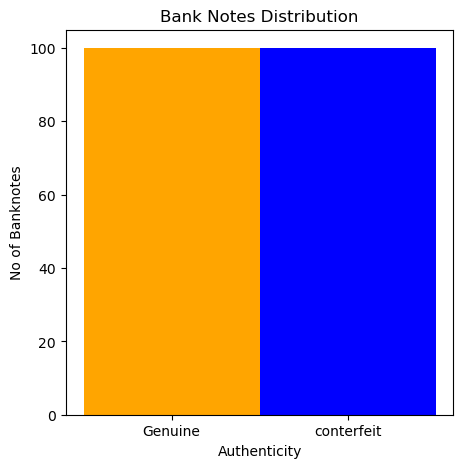

In [4]:
notes = df['conterfeit'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(['Genuine', 'conterfeit'], notes, color=['orange', 'blue'], width=1)
plt.title("Bank Notes Distribution")
plt.xlabel('Authenticity')
plt.ylabel("No of Banknotes")

Targert variables are balanced. There for no need of sampling methods.

### Data distribution with respective to dimensions

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


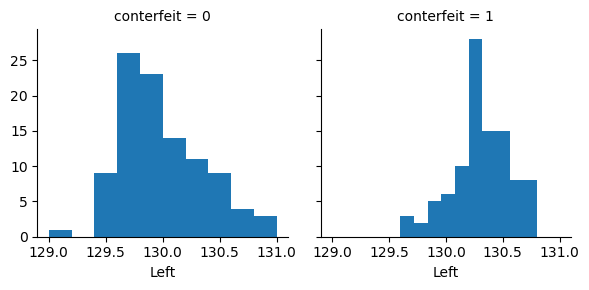

In [5]:
plot = sns.FacetGrid(df, col='conterfeit', margin_titles=True)
plot.map(plt.hist, 'Left')
plt.show()

The Most of the counterfeit banknotes have left-edge width > 130mm

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


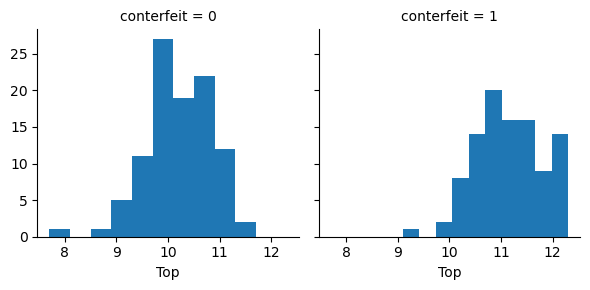

In [6]:
plot = sns.FacetGrid(df, col='conterfeit', margin_titles=True)
plot.map(plt.hist, 'Top')
plt.show()

It cannot be distiguished visually.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


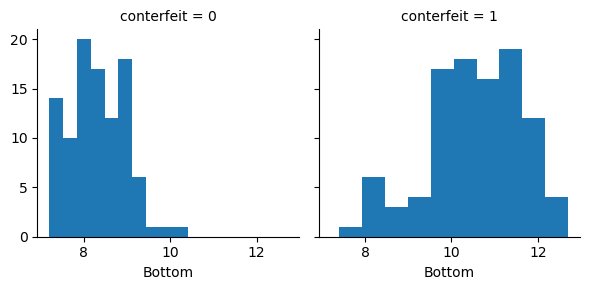

In [7]:
plot = sns.FacetGrid(df, col='conterfeit', margin_titles=True)
plot.map(plt.hist, 'Bottom')
plt.show()

The Most of the counterfeit banknotes have bottom-edge width > 10mm

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


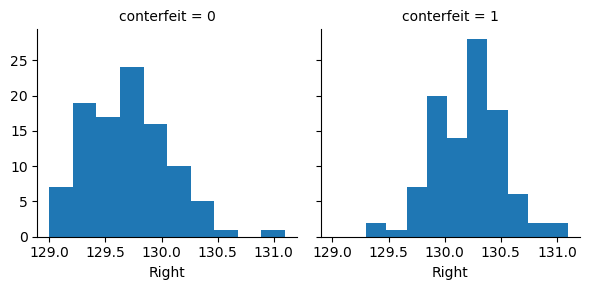

In [8]:
plot = sns.FacetGrid(df, col='conterfeit', margin_titles=True)
plot.map(plt.hist, 'Right')
plt.show()

It cannot be distiguished visually.

### Pairwise Correlation

Correlations between various features should be investigated.

#### Correlation Matrix

In [9]:
new_cols = [x for x in df.columns if x not in ['counterfeit']]

# The correlation matrix

corr_mat = df[new_cols].corr()

for x in range(len(new_cols)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
conterfeit,0.000000,-0.194350,0.495666,0.586761,0.772040,0.602420,-0.899179
Length,-0.194350,0.000000,0.231293,0.151763,-0.189801,-0.061321,0.194301
Left,0.495666,0.231293,0.000000,0.743263,0.413781,0.362350,-0.503229
Right,0.586761,0.151763,0.743263,0.000000,0.486758,0.400670,-0.516476
Bottom,0.772040,-0.189801,0.413781,0.486758,0.000000,0.141851,-0.622983
Top,0.602420,-0.061321,0.362350,0.400670,0.141851,0.000000,-0.594045
Diagonal,-0.899179,0.194301,-0.503229,-0.516476,-0.622983,-0.594045,0.000000


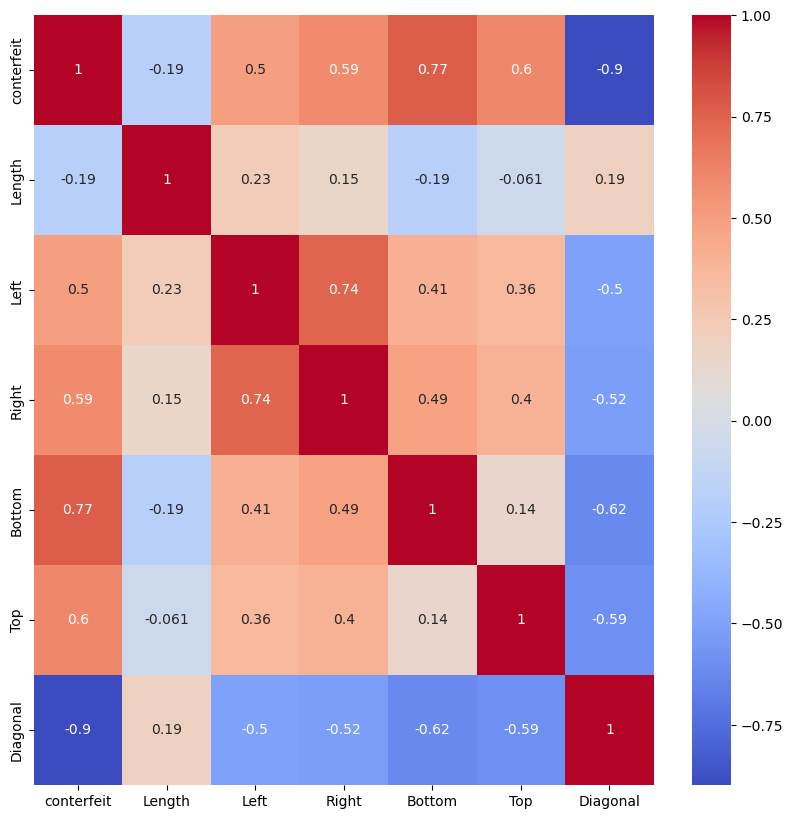

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df[new_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
corr_mat.abs().idxmax()

conterfeit      Diagonal
Length              Left
Left               Right
Right               Left
Bottom        conterfeit
Top           conterfeit
Diagonal      conterfeit
dtype: object

Pairwise maximul correlations


*   Length and Diagonal
*   Left and Right



### Clustering

Evaluate whether the dataset is capable of seperate according to  whether counterfiet or not using unsupervised learning algorithm KMeans.
Priciple Component Analysis is used to achieve the best clustering by reducing dimensionality of the dataset.

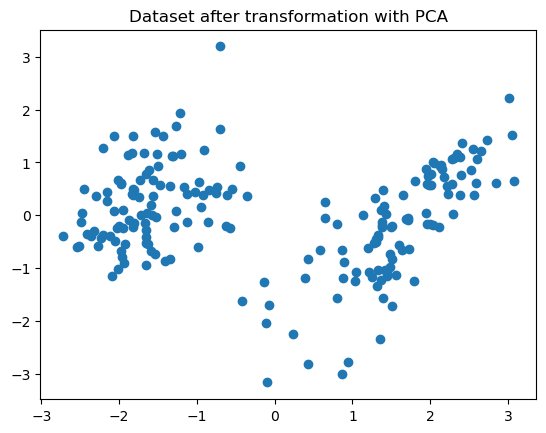

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)

df = df.reindex(np.random.permutation(df.index))

X = df.drop(columns = 'conterfeit')
y = df['conterfeit']

transf = pca.fit_transform(X)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with PCA")
plt.show()

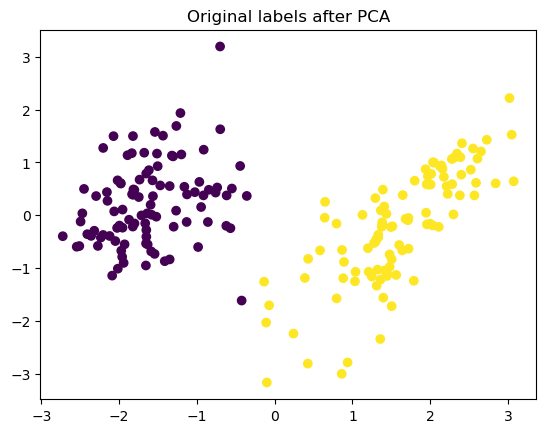

In [13]:
plt.scatter(x = transf[:,0], y = transf[:,1], c=y)
plt.title("Original labels after PCA")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


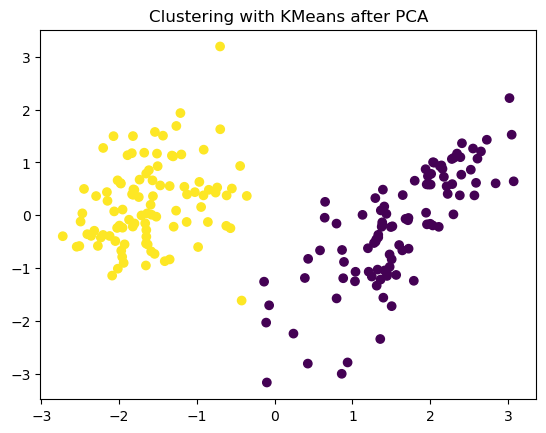

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y=transf[:,1], c = c)
plt.title("Clustering with KMeans after PCA")
plt.show()

Therefore, it can be observed that the dataset can be clustered without target variable using KMeans.

## Data Preprocessing

### Check for Missing Values

In [15]:
totalMissingVals = df.isnull().sum().sort_values(ascending=True)
totalMissingVals

conterfeit    0
Length        0
Left          0
Right         0
Bottom        0
Top           0
Diagonal      0
dtype: int64

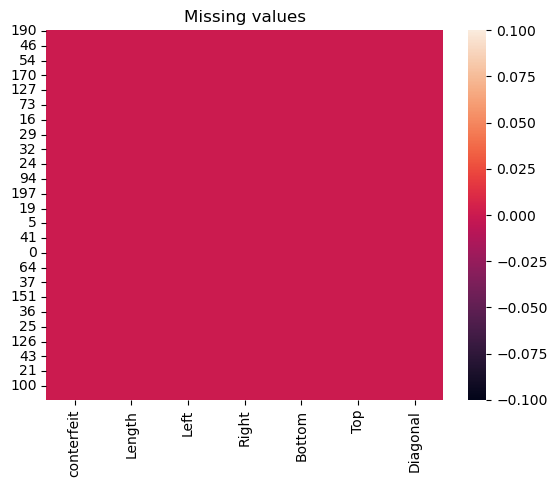

In [16]:
sns.heatmap(df.isnull())
plt.title("Missing values")
plt.show()

No missing values

### Checking for Duplicates

In [17]:
df.index.is_unique

True

Therefore, the dataset does not include duplicates.

### Handling Outliers

#### Boxplot for Length of banknote

Text(0.5, 1.0, 'Boxplot of Lenght')

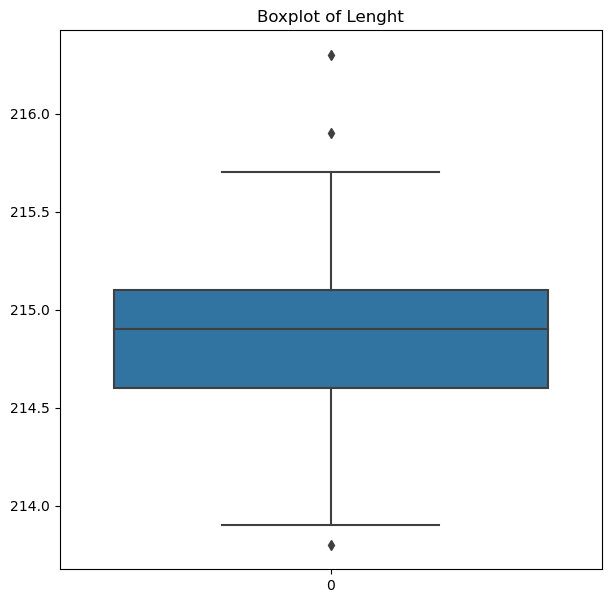

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Length)
plt.title("Boxplot of Lenght")

There are three outliers and those should be removed.

In [19]:
length_mean = df['Length'].mean()
length_std = df['Length'].std()
outliers = (df['Length'] < length_mean - 1.5 * length_std) | (df['Length'] > length_mean + 1.5 * length_std)

df.loc[outliers, 'Length'] = length_mean

There are three outliers out of 200 data points, therefore it will not affect much to the model. Hence, outliers can be replaced with mean.

Text(0.5, 1.0, 'Boxplot of Length without outliers')

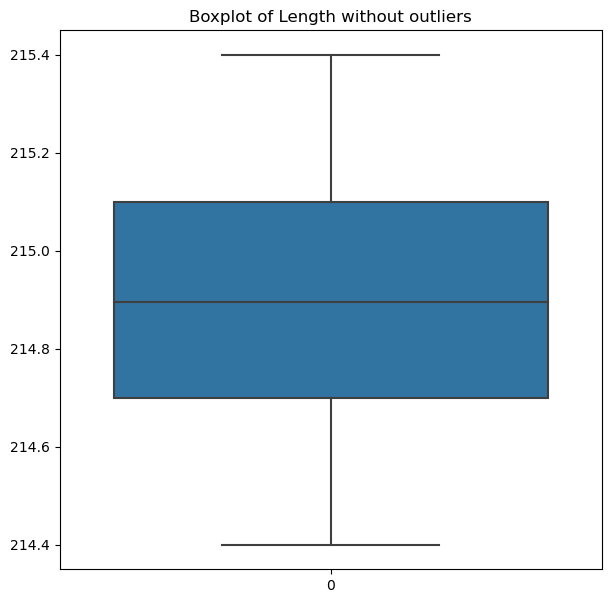

In [20]:
plt.figure(figsize=(7, 7))
sns.boxplot(df['Length'])
plt.title('Boxplot of Length without outliers')

#### Boxplot for Left-edge of the banknote

Text(0.5, 1.0, 'Boxplot of Left-edge')

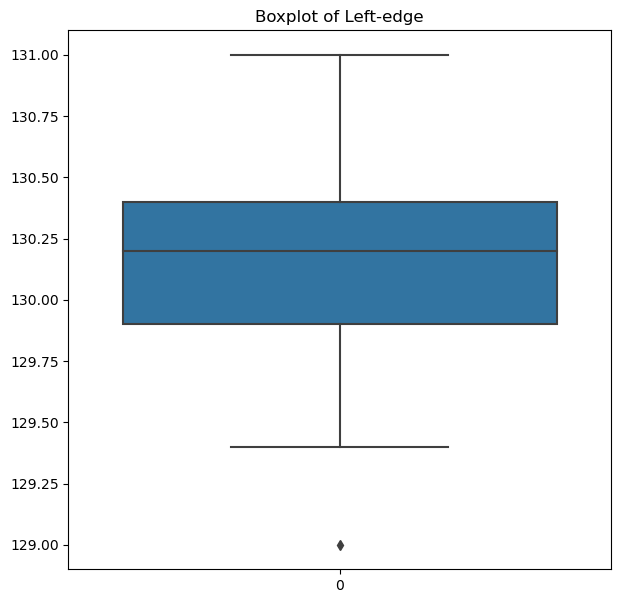

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Left)
plt.title("Boxplot of Left-edge")

There is only one outlier and which can be replaced with the mean.

Text(0.5, 1.0, 'Boxplot of Left-edge without outliers')

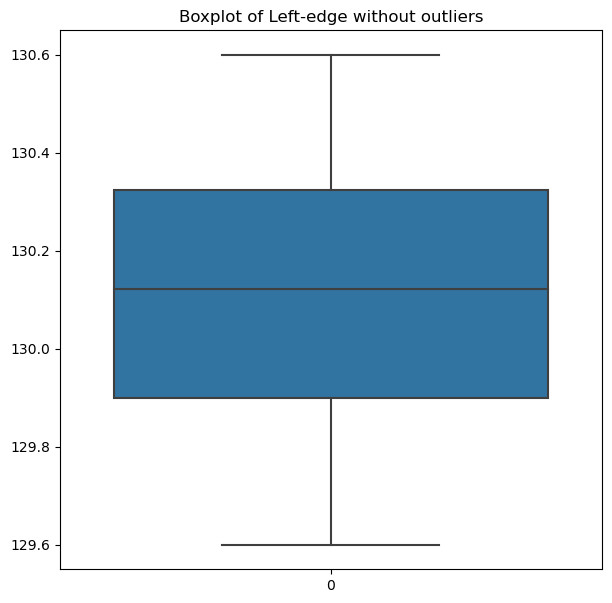

In [22]:
left_mean = df['Left'].mean()
left_std = df['Left'].std()
outliers = (df['Left'] < left_mean - 1.5 * left_std) | (df['Left'] > left_mean + 1.5 * left_std)

df.loc[outliers, 'Left'] = left_mean

plt.figure(figsize=(7, 7))
sns.boxplot(df['Left'])
plt.title('Boxplot of Left-edge without outliers')

#### Boxplot for Right-edge of the banknote

Text(0.5, 1.0, 'Boxplot of Right-edge')

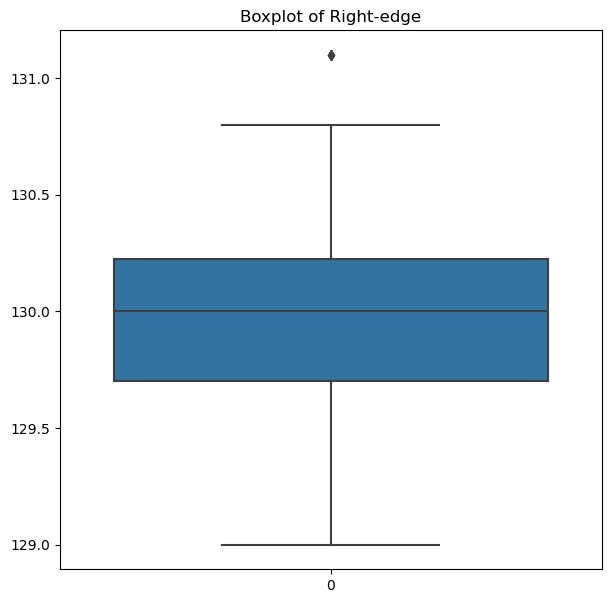

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Right)
plt.title("Boxplot of Right-edge")

Only one outlier and can be replaced with mean.

Text(0.5, 1.0, 'Boxplot of Right-edge without outliers')

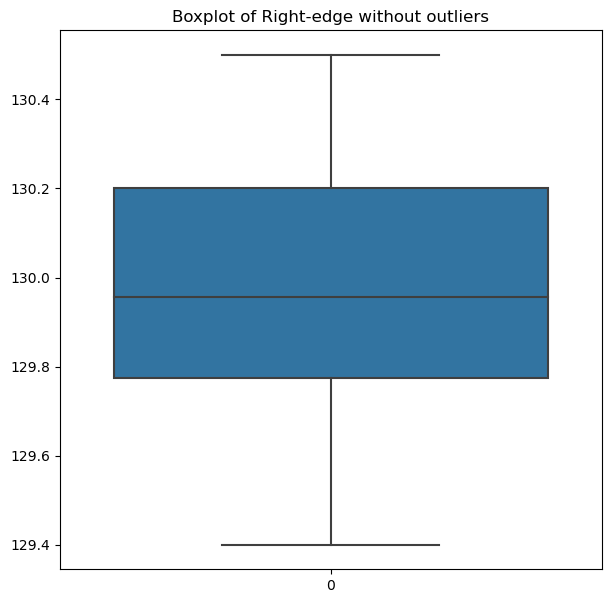

In [24]:
right_mean = df['Right'].mean()
right_std = df['Right'].std()
outliers = (df['Right'] < right_mean - 1.5 * right_std) | (df['Right'] > right_mean + 1.5 * right_std)

df.loc[outliers, 'Right'] = right_mean

plt.figure(figsize=(7, 7))
sns.boxplot(df['Right'])
plt.title('Boxplot of Right-edge without outliers')

#### Boxplot for Bottom-edge of the banknote

Text(0.5, 1.0, 'Boxplot of Bottom-edge')

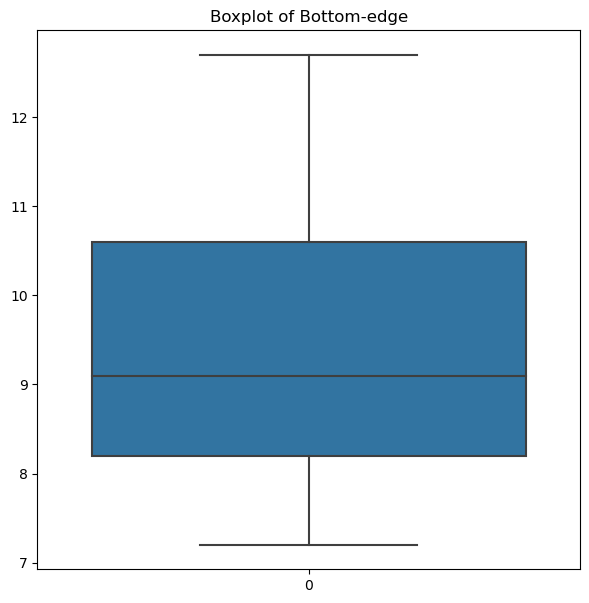

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Bottom)
plt.title("Boxplot of Bottom-edge")

There are no outliers.

#### Boxplot for Top-edge of the banknote

Text(0.5, 1.0, 'Boxplot of Top-edge')

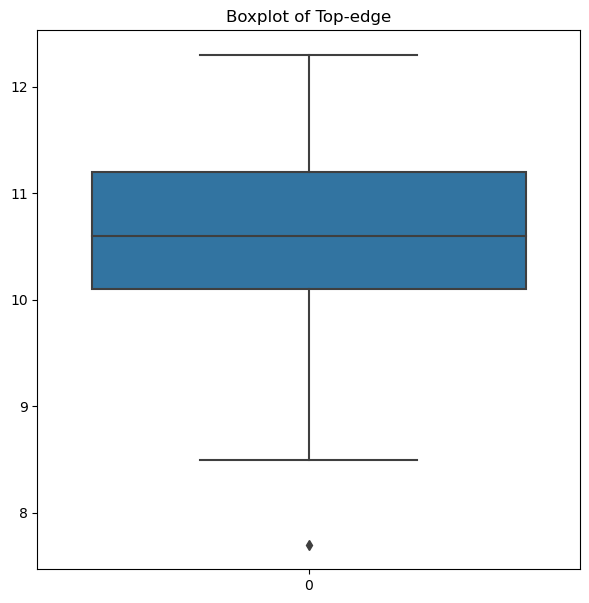

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Top)
plt.title("Boxplot of Top-edge")

Only one outlier and can be replaced with the mean.

Text(0.5, 1.0, 'Boxplot of Top-edge without outliers')

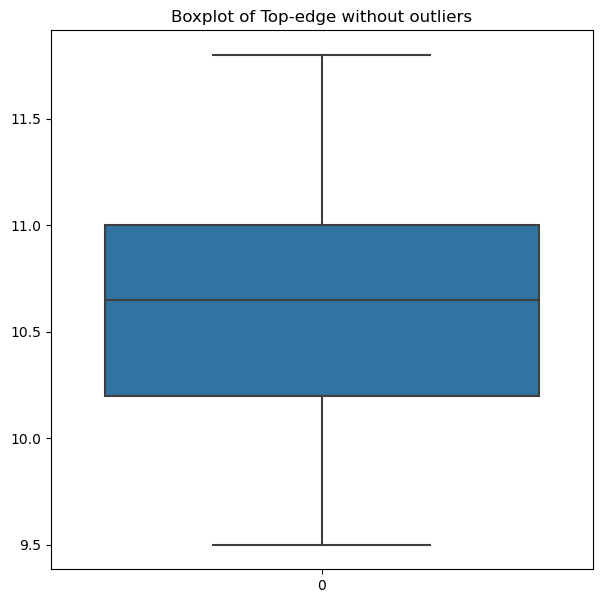

In [27]:
Top_mean = df['Top'].mean()
Top_std = df['Top'].std()
outliers = (df['Top'] < Top_mean - 1.5 * Top_std) | (df['Top'] > Top_mean + 1.5 * Top_std)

df.loc[outliers, 'Top'] = Top_mean

plt.figure(figsize=(7, 7))
sns.boxplot(df['Top'])
plt.title('Boxplot of Top-edge without outliers')

#### Boxplot for diagonal of the banknote

Text(0.5, 1.0, 'Boxplot of Diagonal')

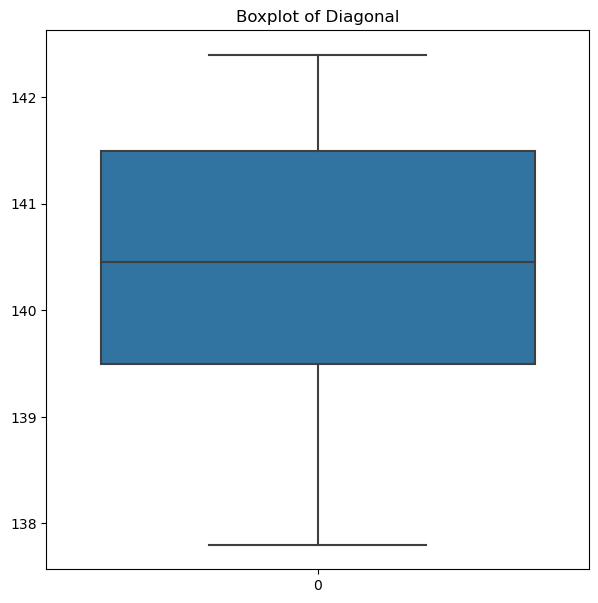

In [28]:
plt.figure(figsize=(7,7))
sns.boxplot(df.Diagonal)
plt.title("Boxplot of Diagonal")

No outliers in diagonal.

## Cross-Validation

Splitting the dataset into training and testing set

In [29]:
df = df.reindex(np.random.permutation(df.index))

X = df.drop(columns = "conterfeit")
y = df["conterfeit"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)

### Logistic Regression with Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

num_folds = 5

logistic_model = LogisticRegression()
logistic_cv_scores = cross_val_score(logistic_model, st.transform(X), y, cv=StratifiedKFold(n_splits=num_folds), scoring='accuracy')
logistic_avg_acc = np.mean(logistic_cv_scores)

print("Logistic Regression Classifier CV scores")
for fold, score in enumerate(logistic_cv_scores, start=1):
  print(f"Fold {fold}: {score}")

print(f"Average Accuracy: {logistic_avg_acc}")


Logistic Regression Classifier CV scores
Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 1.0
Fold 5: 0.975
Average Accuracy: 0.9949999999999999


### Random Forest Classifier with Cross-Validation

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
rf_cv = StratifiedKFold(n_splits=num_folds)
rf_cv_scores = cross_val_score(random_forest_model, st.transform(X), y, cv=rf_cv, scoring='accuracy')

print("Random Forest Cross-Validation Scores:")
for fold, score in enumerate(rf_cv_scores, start=1):
    print(f"Fold {fold}: {score}")

rf_avg_acc = np.mean(rf_cv_scores)
print(f"Average Accuracy: {rf_avg_acc}\n")

Random Forest Cross-Validation Scores:
Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.975
Fold 5: 0.975
Average Accuracy: 0.99



## Model Training

### Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(st.transform(X_test))

#### Accuracy Metrics

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix: 

 [[15  0]
 [ 0 25]]

Accuracy
 1.0


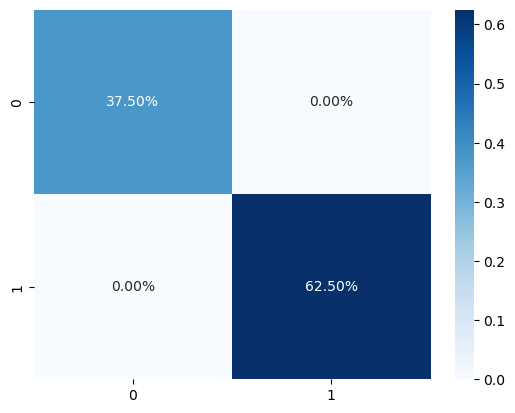

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)

print("Classification Report: \n\n", class_report)
print("Confusion Matrix: \n\n", conf_matrix)
print("\nAccuracy\n", acc)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

results = []
results.append(("LogisticRegression", acc))

### Random Forest - Bagging

In [34]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred = rfc.predict(st.transform(X_test))

#### Accuracy Metrics

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
: [[15  0]
 [ 0 25]]

Accuracy
 1.0


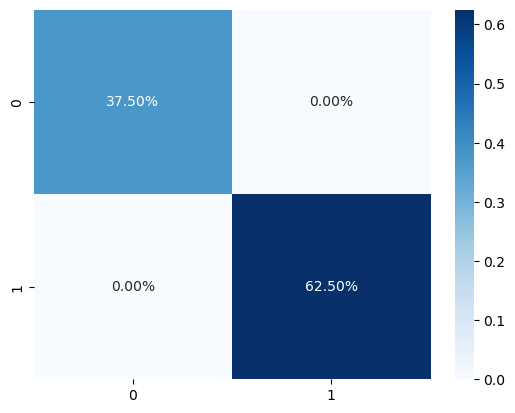

In [35]:
class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n:", conf_matrix)
print("\nAccuracy\n", acc)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

results.append(("RandomForestClassifier", acc))

## Comparison of the models

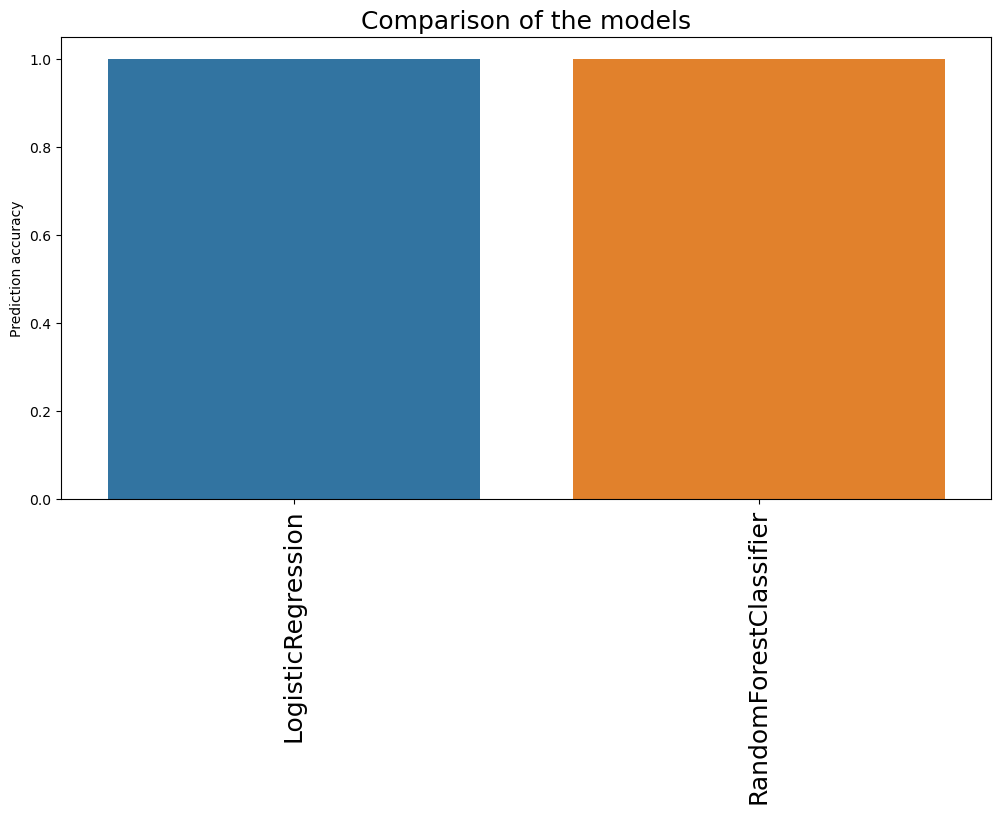

In [36]:
labels = []
height = []
for i in range(len(results)):
  labels.append(results[i][0])
  height.append(results[i][-1])

plt.figure(figsize = (12, 6))
ax = sns.barplot(x=labels, y=height)
ax.set_xticklabels(labels, fontsize = 18, rotation = 90)
plt.title("Comparison of the models", fontsize = 18)
plt.ylabel("Prediction accuracy")
plt.show()
